OASIS INFOBYTE INTERNSHIP

**TASK:5 SALES PREDICTION USING PYTHON**

BY: *Vaishnavi Jadhav*  |  Email: vaishnavisj123@gmail.com 

# **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# **Load Dataset**

In [3]:
sales_df=pd.read_csv("Advertising.csv")

In [4]:
sales_df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
sales_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
sales_df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
sales_df.duplicated().sum()

0

In [9]:
sales_df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [10]:
sales_df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

# **Drop Column**

In [11]:
sales_df.drop(columns=["Unnamed: 0"], inplace=True)

# **Data Visualization**

## **SubPlot**

C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_10672\3442756668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.Sales,color="b")
C:\Users\Anushka Gunjal\AppData\Local\Temp\ipykernel_10672\3442756668.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_df.TV,color="r")
C:\

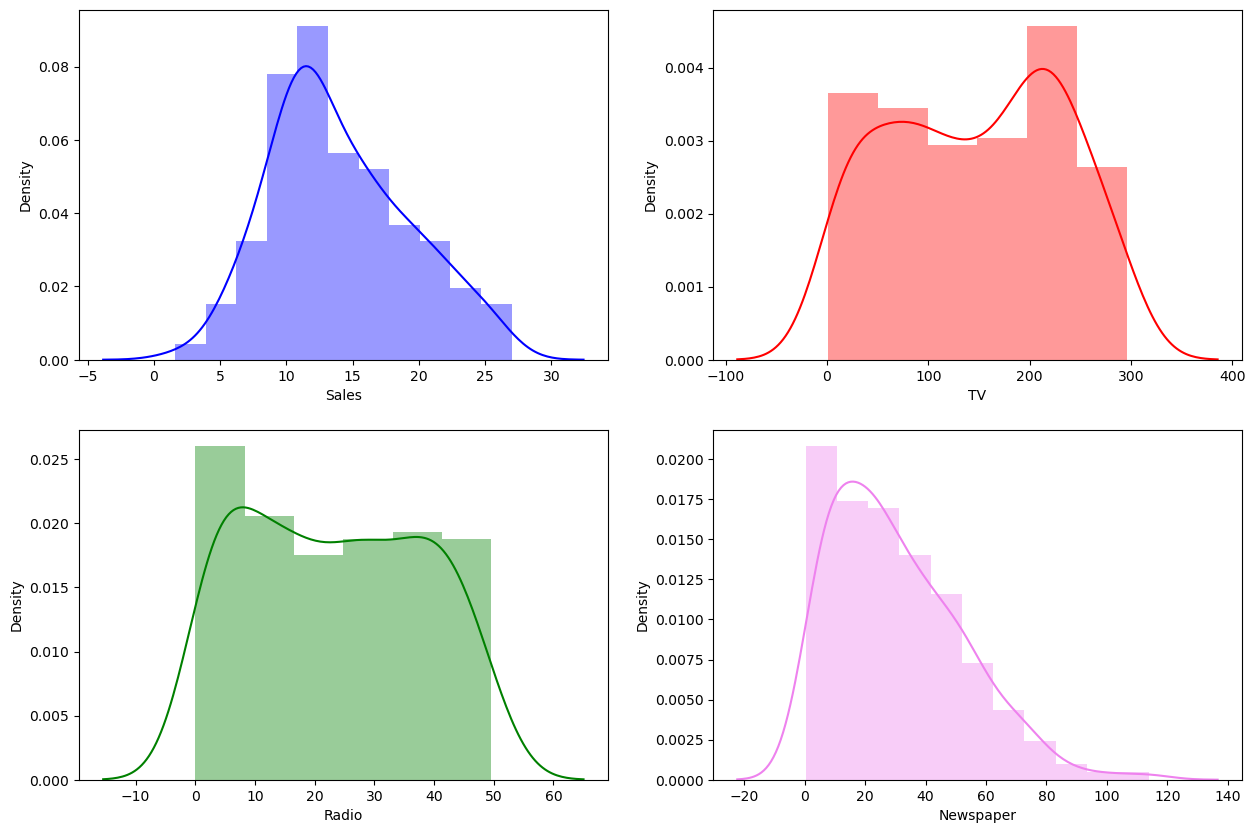

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.distplot(sales_df.Sales,color="b")

plt.subplot(222)
sns.distplot(sales_df.TV,color="r")

plt.subplot(223)
sns.distplot(sales_df.Radio,color="g")

plt.subplot(224)
sns.distplot(sales_df.Newspaper,color="violet")
plt.show()

## **Pair Plot**

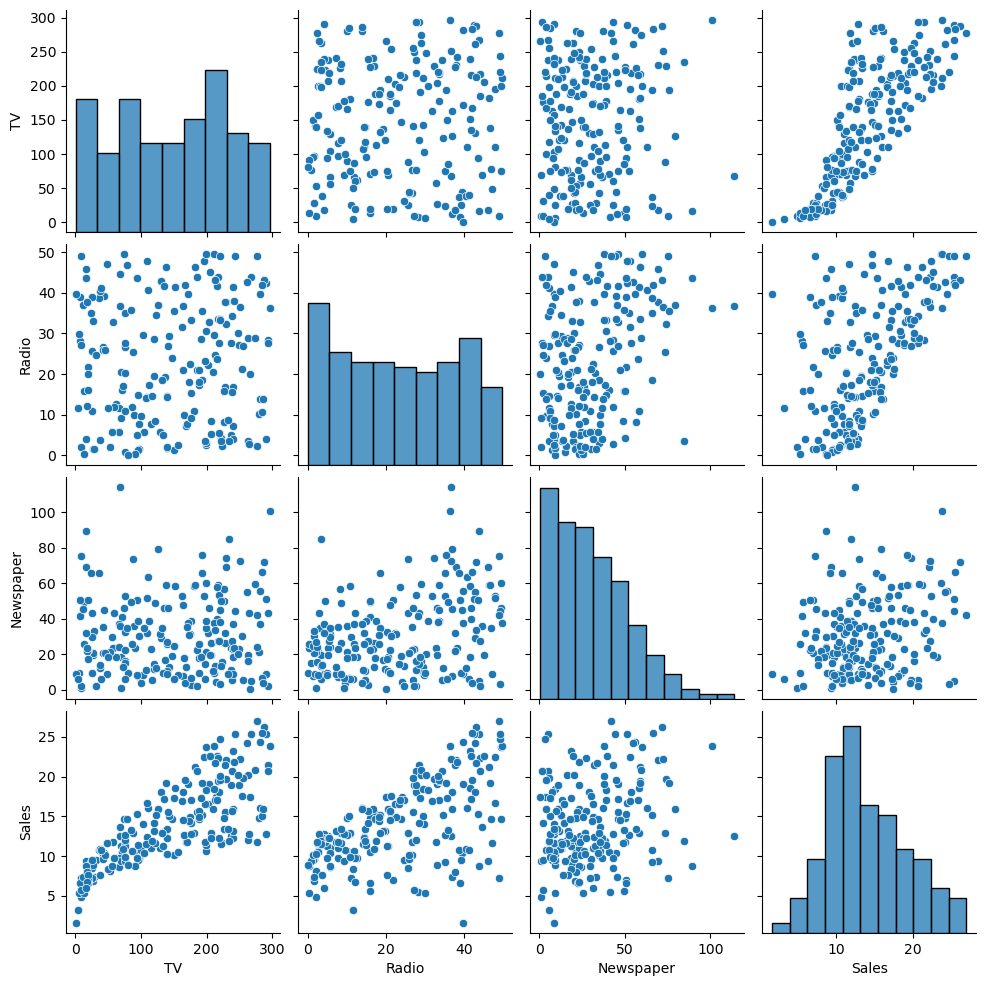

In [13]:
sns.pairplot(sales_df)

## **BoxPlot**

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# plot box plot for sales
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "box"}, {"type": "box"}],
           [{"type": "box"}, {"type": "box"}]],subplot_titles=["Sales","TV","Radio","Newspaper"])

# plot box plot for sales
fig.add_trace(go.Box(y=np.array(sales_df["Sales"])), row=1, col=1)

# plot box plot for TV
fig.add_trace(go.Box(y=np.array(sales_df["TV"])), row=1, col=2)

# plot box plot for Radio
fig.add_trace(go.Box(y=np.array(sales_df["Radio"])), row=2, col=1)

# plot box plot for Newspaper
fig.add_trace(go.Box(y=np.array(sales_df["Newspaper"])), row=2, col=2)

#set title for the plot
fig.update_layout(showlegend=False,title_text="Box plots of all features",width=800,height=600)

## **HeatMap**

In [15]:
sales_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


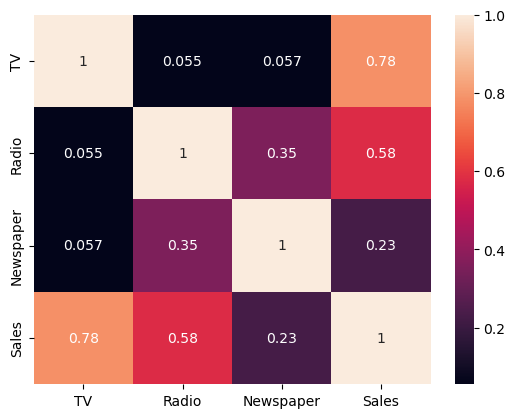

In [16]:
sns.heatmap(sales_df.corr(),annot=True)
plt.show()

In [17]:
features = sales_df[['TV', 'Radio', 'Newspaper']]
target = sales_df['Sales']


In [18]:
display(features)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [19]:
display(target)

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

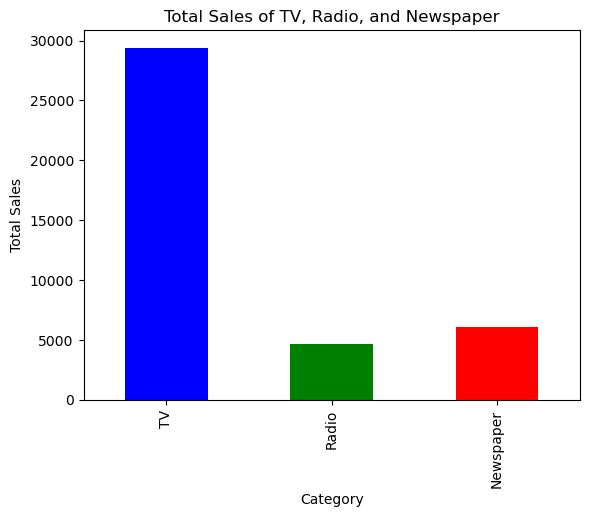

In [31]:
# Sum the sales for each category
sales_sum = sales_df[['TV', 'Radio', 'Newspaper']].sum()

# Plot the bar graph
sales_sum.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Total Sales of TV, Radio, and Newspaper')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

# **Training and Testing Model**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.2,random_state=3)

In [22]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {Y_train.shape}")
print(f"y_test shape: {Y_test.shape}")

X_train shape: (160, 3)
X_test shape: (40, 3)
y_train shape: (160,)
y_test shape: (40,)


In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

In [24]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)

In [25]:
print(f"{name} Performance:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}\n")

Random Forest Performance:
R² Score: 0.9808
MSE: 0.4802
RMSE: 0.6930
MAE: 0.5048



# **Predicted Vs Actual**

In [26]:
# Predictions
final_model = models["Random Forest"]
y_pred_final = final_model.predict(X_test)
predictions_df = pd.DataFrame({'Actual Sales': Y_test, 'Predicted Sales': y_pred_final})
print(predictions_df.head())

     Actual Sales  Predicted Sales
40           16.6           16.445
51           10.7           10.424
139          20.7           21.136
197          12.8           12.550
170           8.4            9.340


# **Model Evaluation**

In [27]:
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

In [28]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 0.48018367499999465
Root Mean Squared Error (RMSE): 0.6929528663624926
Mean Absolute Error (MAE): 0.5048249999999967
R-squared (R2) Score: 0.9807901509171572


# **Conclusion**

In [29]:
print("Model Performance Summary:")
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, y_pred)
    
    print(f"{name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}\n")

# Best model
best_model_name = max(models, key=lambda name: r2_score(Y_test, models[name].predict(X_test)))
print(f"The best performing model is: {best_model_name}")

Model Performance Summary:
Linear Regression Performance:
R² Score: 0.9138
MSE: 2.1538
RMSE: 1.4676
MAE: 1.1987

Decision Tree Performance:
R² Score: 0.9589
MSE: 1.0272
RMSE: 1.0135
MAE: 0.8225

Random Forest Performance:
R² Score: 0.9808
MSE: 0.4802
RMSE: 0.6930
MAE: 0.5048

The best performing model is: Random Forest
